# Empirically Evaluating the Difficulty of Problems for QAOA

In this notebook we will be using Entropica's OpenQAOA package to explore the QAOA on a variety of problems and experimentally determine the relative difficulty (although they all fall into the same complexity category). All of this work will be done on a simulator. 

In [4]:
from openqaoa.problems.problem import MinimumVertexCover, NumberPartition, TSP, MaximumCut, Knapsack, SlackFreeKnapsack
from openqaoa.workflows.optimizer import QAOA, RQAOA
from openqaoa.utilities import ground_state_hamiltonian
import numpy as np
import matplotlib.pyplot as plt

In [16]:
rep = 3
max_size = 15
sizes = []


nps = []
tsps = []
mcs = []
ks = []
sfks = []
mvcs = []


for size in range(2, max_size + 1):
    sizes.append(size)
    
    nps.append([])
    tsps.append([])
    mcs.append([])
    ks.append([])
    sfks.append([])
    mvcs.append([])
    for r in range(rep):
        print(size, r)
        seed = np.random.randint(0, 10000)
        
        q = QAOA()
        problem = MinimumVertexCover.random_instance(n_nodes=size, edge_probability=0.9, seed=seed)\
                .get_qubo_problem()
        energy, _ = ground_state_hamiltonian(problem.hamiltonian)
        q.compile(problem)
        q.optimize()
        val = abs(q.results.optimized["optimized cost"] - energy)
        mvcs[-1].append(val)
        
        q = QAOA()
        problem = NumberPartition.random_instance(n_numbers=size, seed=seed).get_qubo_problem()
        energy, _ = ground_state_hamiltonian(problem.hamiltonian)
        q.compile(problem)
        q.optimize()
        val = abs(q.results.optimized["optimized cost"] - energy)
        nps[-1].append(val)

        q = QAOA()
        problem = MaximumCut.random_instance(n_nodes=size, edge_probability=0.9, seed=seed).get_qubo_problem()
        energy, _ = ground_state_hamiltonian(problem.hamiltonian)
        q.compile(problem)
        q.optimize()
        val = abs(q.results.optimized["optimized cost"] - energy)
        mcs[-1].append(val)

2 0
2 1
2 2
3 0
3 1
3 2
4 0
4 1
4 2
5 0
5 1
5 2
6 0
6 1
6 2
7 0
7 1
7 2
8 0
8 1
8 2
9 0
9 1
9 2
10 0
10 1
10 2
11 0
11 1
11 2
12 0
12 1
12 2
13 0
13 1
13 2
14 0
14 1
14 2
15 0
15 1
15 2


In [20]:
rep = 3
max_size = 15
sizes = []


nps_r = []
tsps_r = []
mcs_r = []
ks_r = []
sfks_r = []
mvcs_r = []

for size in range(2, max_size + 1):
    sizes.append(size)
    
    nps_r.append([])
    tsps_r.append([])
    mcs_r.append([])
    ks_r.append([])
    sfks_r.append([])
    mvcs_r.append([])
    for r in range(rep):
        print(size, r)
        seed = np.random.randint(0, 10000)
        
        q = RQAOA()
        problem = MinimumVertexCover.random_instance(n_nodes=size, edge_probability=0.9, seed=seed)\
                .get_qubo_problem()
        energy, _ = ground_state_hamiltonian(problem.hamiltonian)
        q.compile(problem)
        q.optimize()
        val = abs(q.result["classical output"]['minimum energy'] - energy)
        mvcs_r[-1].append(val)
        
        q = RQAOA()
        problem = NumberPartition.random_instance(n_numbers=size, seed=seed).get_qubo_problem()
        energy, _ = ground_state_hamiltonian(problem.hamiltonian)
        q.compile(problem)
        q.optimize()
        val = abs(q.result["classical output"]['minimum energy'] - energy)
        nps_r[-1].append(val)
        
        q = RQAOA()
        problem = MaximumCut.random_instance(n_nodes=size, edge_probability=0.9, seed=seed).get_qubo_problem()
        energy, _ = ground_state_hamiltonian(problem.hamiltonian)
        q.compile(problem)
        q.optimize()
        val = abs(q.result["classical output"]['minimum energy'] - energy)
        mcs_r[-1].append(val)

2 0
2 1
2 2
3 0
3 1
3 2
4 0
4 1
4 2
5 0
5 1
5 2
6 0
6 1
6 2
7 0
7 1
7 2
8 0
8 1
8 2
9 0
9 1
9 2
10 0
10 1
10 2
11 0
11 1
11 2
12 0
12 1
12 2
13 0
13 1
13 2
14 0
14 1
14 2
15 0
15 1
All expectation values are 0: Breaking degeneracy by fixing a qubit

15 2


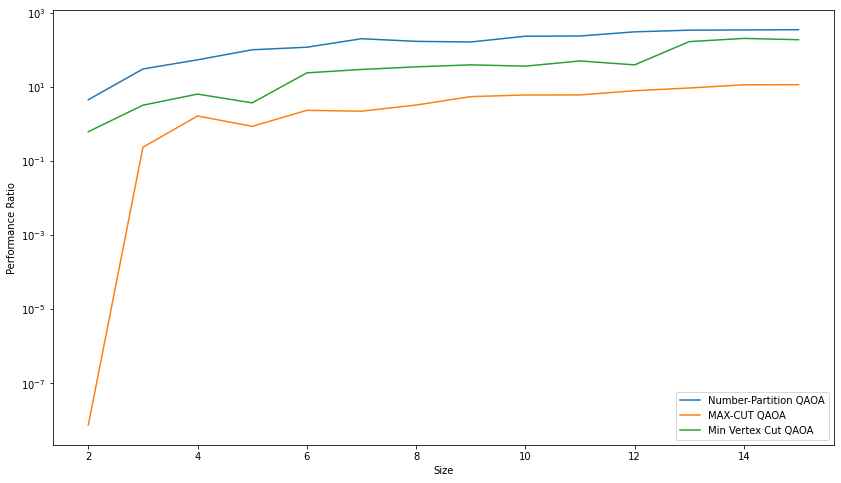

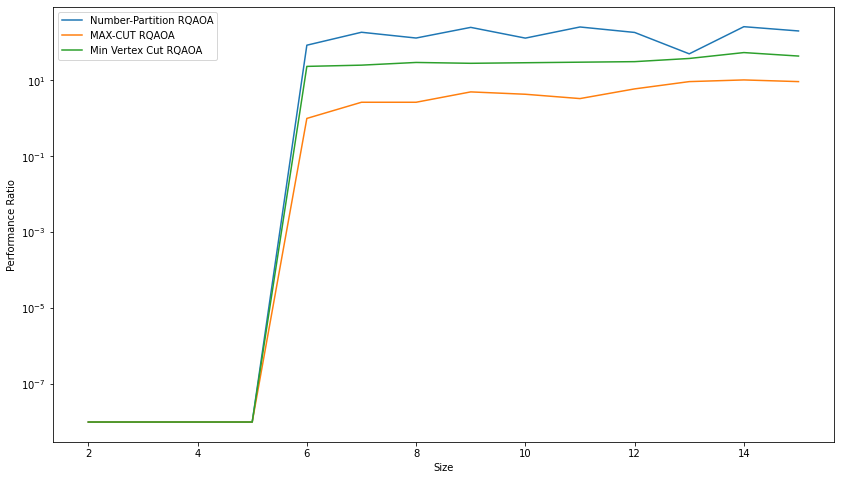

In [21]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.plot(sizes, np.mean(nps, axis=1), label='Number-Partition QAOA')
plt.plot(sizes, np.mean(mcs, axis=1), label='MAX-CUT QAOA')
plt.plot(sizes, np.mean(mvcs, axis=1), label='Min Vertex Cut QAOA')

plt.legend()
plt.yscale('log')
plt.xlabel("Size")
plt.ylabel("Performance Ratio")
plt.show()

fig, ax = plt.subplots(figsize=(14, 8))
plt.plot(sizes, np.mean(nps_r, axis=1) + 1e-8, label='Number-Partition RQAOA')
plt.plot(sizes, np.mean(mcs_r, axis=1) + 1e-8, label='MAX-CUT RQAOA')
plt.plot(sizes, np.mean(mvcs_r, axis=1) + 1e-8, label='Min Vertex Cut RQAOA')

plt.legend()
plt.yscale('log')
plt.xlabel("Size")
plt.ylabel("Performance Ratio")
plt.show()